## **Import required libraries**

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **Load the dataset**

In [192]:
df = pd.read_csv('online_retail_II.csv')

print("Data loaded:", df.shape)
print(df.columns)
print(df.head())


Data loaded: (1048575, 8)
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country'],
      dtype='object')
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

        InvoiceDate  Price  CustomerID         Country  
0  01-12-2009 07:45   6.95     13085.0  United Kingdom  
1  01-12-2009 07:45   6.75     13085.0  United Kingdom  
2  01-12-2009 07:45   6.75     13085.0  United Kingdom  
3  01-12-2009 07:45   2.10     13085.0  United Kingdom  
4  01-12-2009 07:45   1.25     13085.0  United Kingdom  


## **Create Revenue column**

In [193]:
df['Revenue'] = df['Quantity'] * df['Price']


## **Top 10 products by quantity sold**

In [194]:
top_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)


## **Top 10 products by total revenue**

In [195]:
top_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)


## **Most returned products (negative quantity)**

In [196]:
returned = df[df['Quantity'] < 0]
most_returned = returned.groupby('Description')['Quantity'].sum().sort_values().head(10)


## **Convert InvoiceDate to datetime**

In [197]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', dayfirst=True)


## **Extract month for trend analysis**

In [198]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')


## **Monthly revenue trends of top 5 revenue-generating products**

In [199]:
monthly_revenue = df.groupby(['Month', 'Description'])['Revenue'].sum().reset_index()
top5_products = top_revenue.index
filtered_trends = monthly_revenue[monthly_revenue['Description'].isin(top5_products)]


## **Plot top 10 products by quantity**

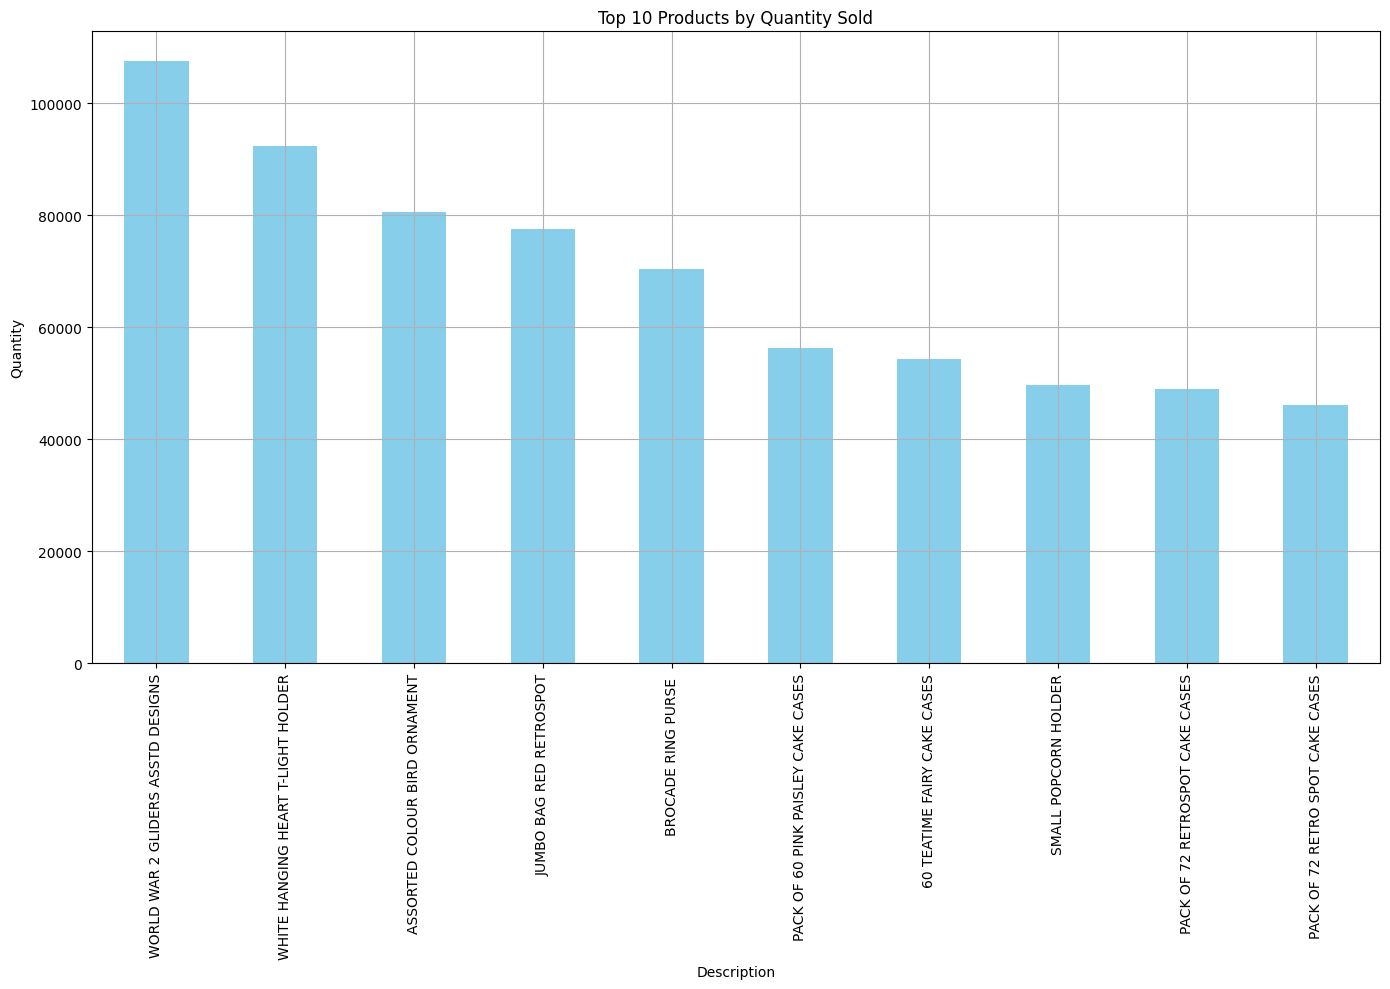

In [200]:
plt.figure(figsize=(14, 10))
top_qty.plot(kind='bar', title='Top 10 Products by Quantity Sold', color='skyblue')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


## **Plot top 10 products by revenue**

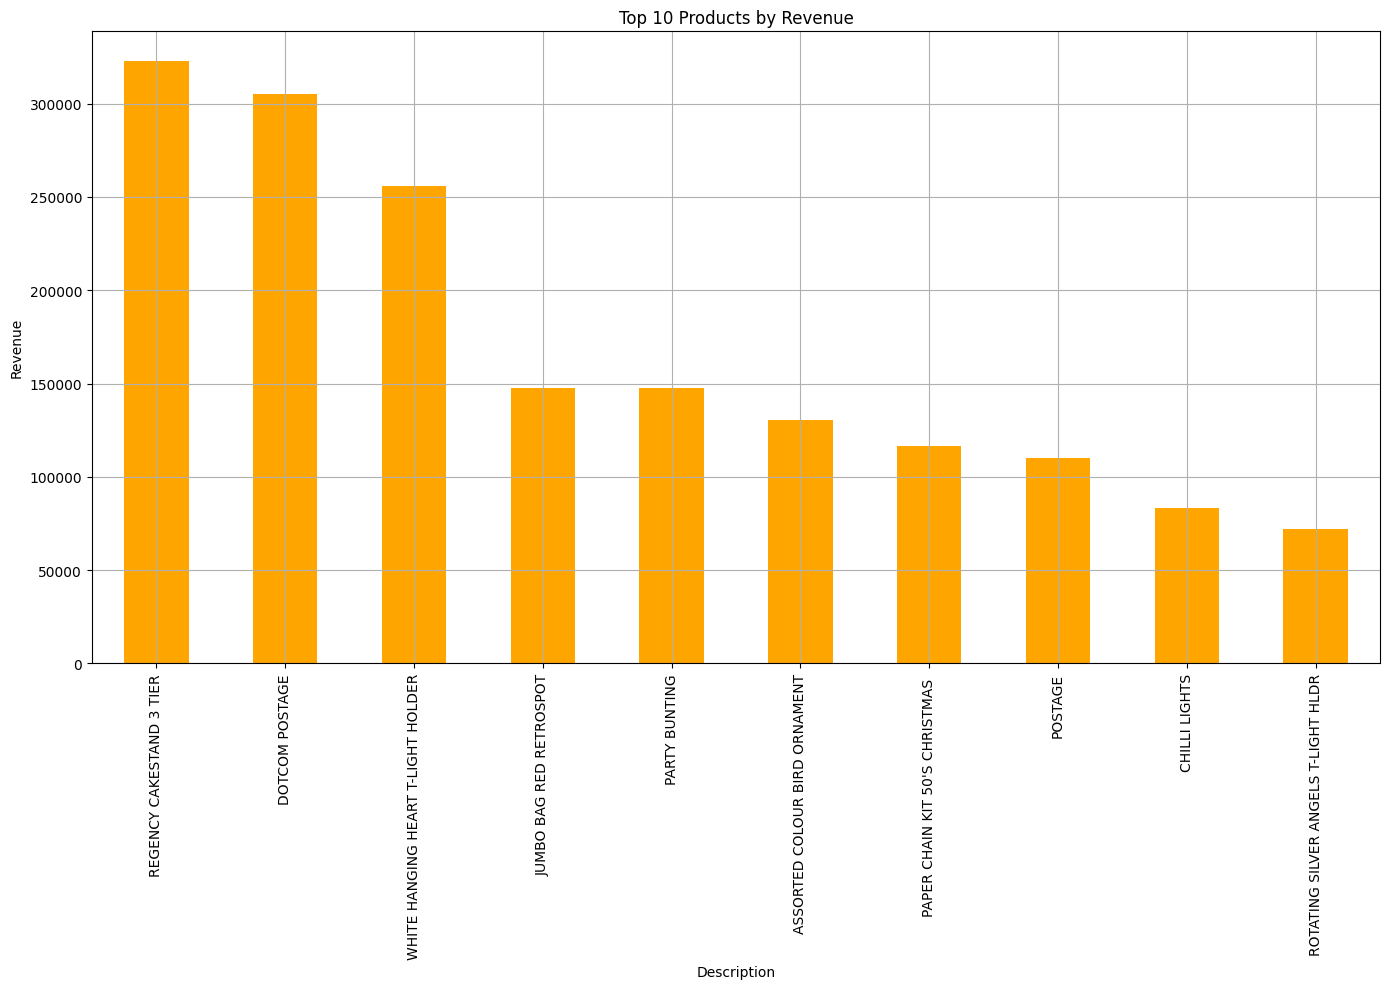

In [201]:
plt.figure(figsize=(14, 10))
top_revenue.plot(kind='bar', title='Top 10 Products by Revenue', color='orange')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


## **Plot most returned products**

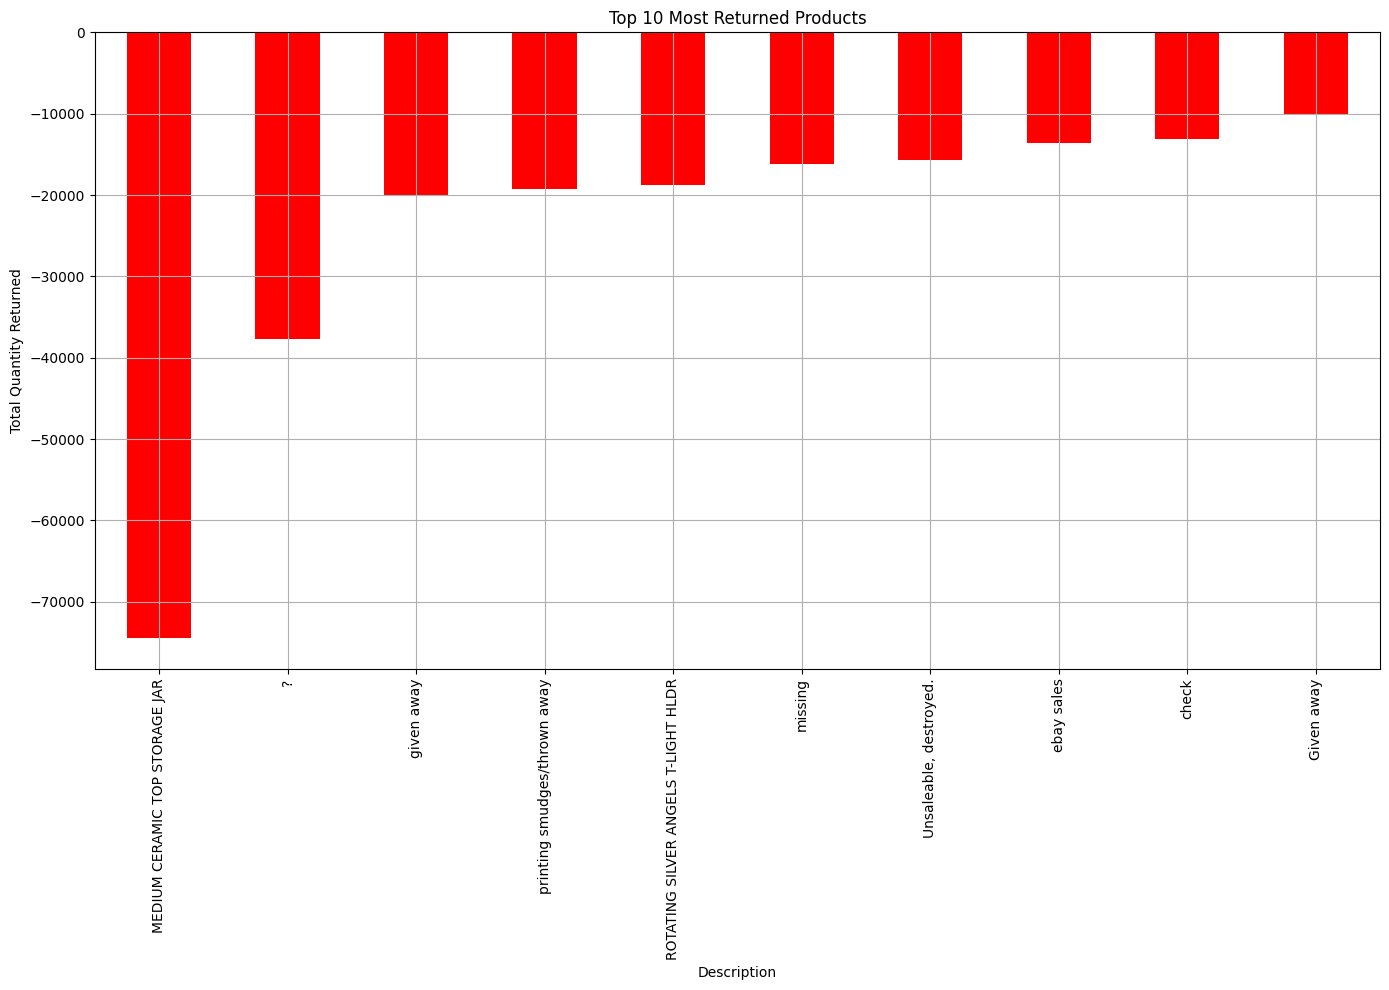

In [202]:
if not most_returned.empty:
    plt.figure(figsize=(14, 10))
    most_returned.plot(kind='bar', title='Top 10 Most Returned Products', color='red')
    plt.ylabel('Total Quantity Returned')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No returned products found in the data.")


## **Monthly trend line for top 5 products**

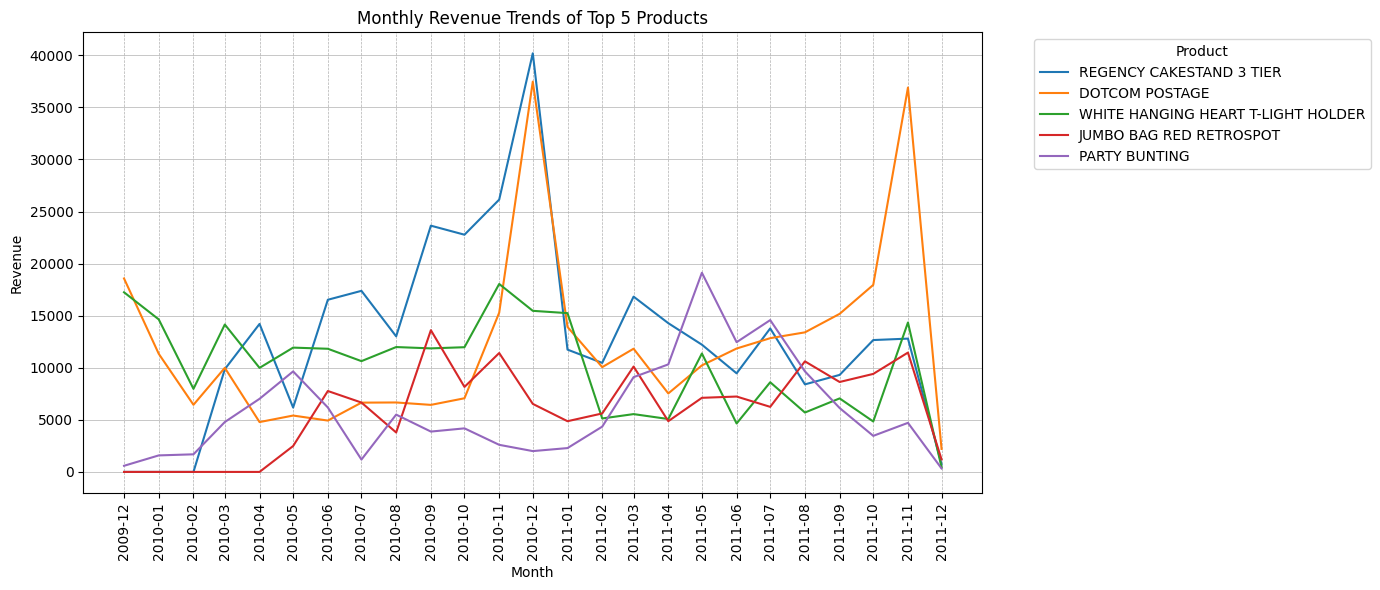

In [203]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', dayfirst=True)
df['Month'] = df['InvoiceDate'].dt.to_period('M')

top5_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(5).index

monthly_revenue = df.groupby(['Month', 'Description'])['Revenue'].sum().reset_index()

filtered_trends = monthly_revenue[monthly_revenue['Description'].isin(top5_products)].copy()

filtered_trends['Month'] = filtered_trends['Month'].astype(str)
filtered_trends['MonthDate'] = pd.to_datetime(filtered_trends['Month'], format='%Y-%m')

all_months = pd.date_range(start=filtered_trends['MonthDate'].min(), end=filtered_trends['MonthDate'].max(), freq='MS')

plt.figure(figsize=(14, 6))

for product in top5_products:
    trend_data = filtered_trends[filtered_trends['Description'] == product].sort_values('MonthDate')
    trend_data = trend_data.set_index('MonthDate').reindex(all_months, fill_value=0).reset_index()
    plt.plot(trend_data['index'], trend_data['Revenue'], label=product)

plt.title('Monthly Revenue Trends of Top 5 Products')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(all_months, all_months.strftime('%Y-%m'), rotation=90)
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)
plt.grid(True, axis='y', linestyle='-', linewidth=0.5)
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## **Revenue Contribution % by Top 10 Products**

In [204]:
total_revenue = df['Revenue'].sum()
contrib_percent = (top_revenue / total_revenue * 100).round(2)
print("Revenue Contribution of Top 10 Products (%):\n", contrib_percent)


Revenue Contribution of Top 10 Products (%):
 Description
REGENCY CAKESTAND 3 TIER               1.70
DOTCOM POSTAGE                         1.61
WHITE HANGING HEART T-LIGHT HOLDER     1.35
JUMBO BAG RED RETROSPOT                0.78
PARTY BUNTING                          0.78
ASSORTED COLOUR BIRD ORNAMENT          0.69
PAPER CHAIN KIT 50'S CHRISTMAS         0.61
POSTAGE                                0.58
CHILLI LIGHTS                          0.44
ROTATING SILVER ANGELS T-LIGHT HLDR    0.38
Name: Revenue, dtype: float64
